In [99]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import librosa
import spafe

In [100]:
f1 = "Ensoniq-SQ-1-Biwa-C4.wav"

samplerate1, data1 = wavfile.read(f1)
duration1 = len(data1) / samplerate1
time1 = np.arange(0, duration1, 1/samplerate1)

C:\Users\Иван\AppData\Local\Temp\ipykernel_3392\3346534173.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1, data1 = wavfile.read(f1)


In [101]:
f2 = "Ensoniq-ZR-76-Biwa-C3.wav"

samplerate2, data2 = wavfile.read(f2)
duration2 = len(data2) / samplerate2
time2 = np.arange(0, duration2, 1/samplerate2)

C:\Users\Иван\AppData\Local\Temp\ipykernel_3392\3092803367.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate2, data2 = wavfile.read(f2)


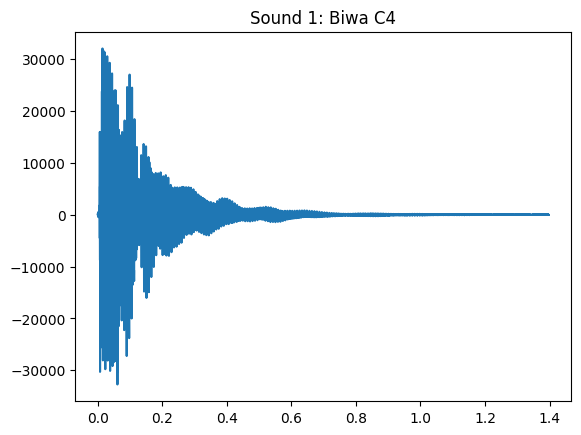

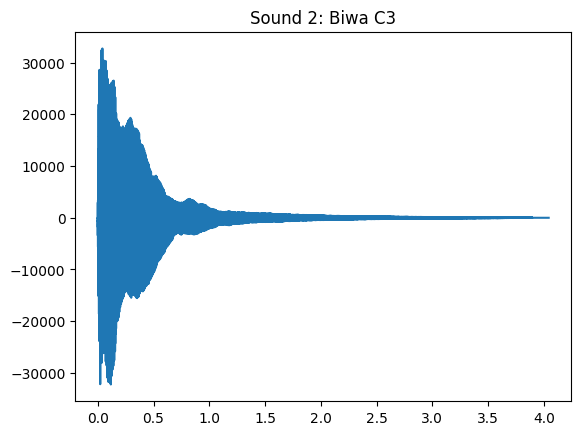

In [102]:
plt.plot(time1, data1[:, 0])
plt.title("Sound 1: Biwa C4")
plt.show()
plt.plot(time2, data2[:, 0])
plt.title("Sound 2: Biwa C3")
plt.show()

In [103]:
sd.play(data1[:, 0], samplerate1)
sd.wait()

In [104]:
sd.play(data2[:, 0], samplerate2)
sd.wait()

#### Спектр

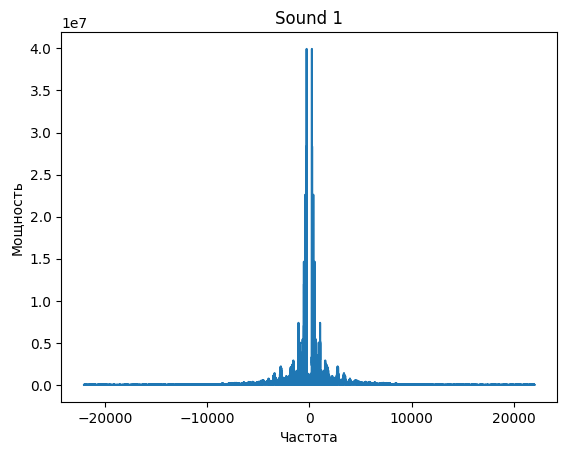

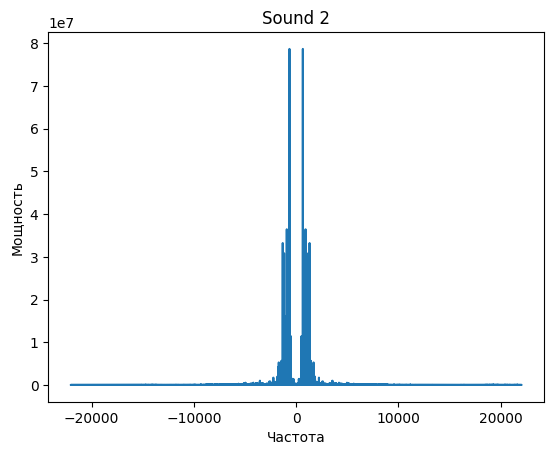

In [105]:
from scipy.fft import fft, fftfreq

N1 = int(samplerate1 * duration1)

yf1 = fft(data1[:, 0])
xf1 = fftfreq(N1 + 1, 1 / samplerate1)

plt.plot(xf1, np.abs(yf1))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title("Sound 1")
plt.show()

N2 = int(samplerate2 * duration2)

yf2 = fft(data2[:, 0])
xf2 = fftfreq(N2, 1 / samplerate1)

plt.plot(xf2, np.abs(yf2))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('Sound 2')
plt.show()

#### Мел-кепстральные коэффициенты

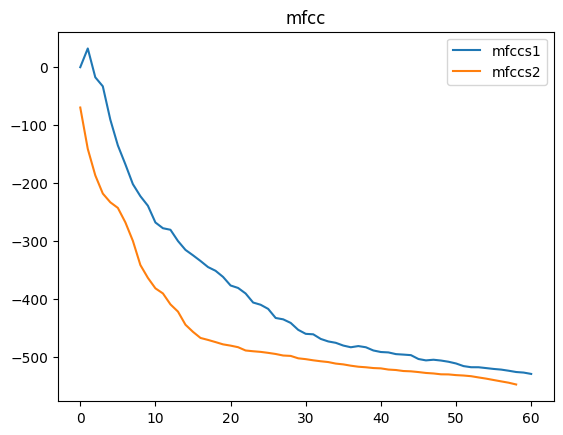

In [106]:
samples, sample_rate = librosa.load(f1)
y = samples
sr = sample_rate
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)
s = mfccs[0:1,:][0,:]
t = [*range(len(s))]
plt.plot(t, s, label='mfccs1')


samples, sample_rate = librosa.load(f2)
y = samples
sr = sample_rate
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)
s = mfccs[0:1,:][0,:][::3]
t = [*range(len(s))]
plt.plot(t, s, label='mfccs2')
plt.legend()
plt.title('mfcc')
plt.show()

#### Гамматон-частотные кепстральные коэффициенты

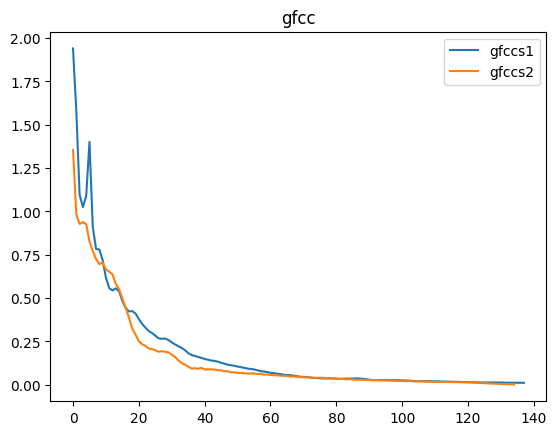

In [107]:
samples, sample_rate = librosa.load(f1)
y = samples
sr = sample_rate
gfccs = spafe.features.gfcc.gfcc(y, fs=sr, num_ceps=10)
plt.plot(gfccs[:,0], label='gfccs1')
plt.title('gfccs1')


samples, sample_rate = librosa.load(f2)
y = samples
sr = sample_rate
gfccs = spafe.features.gfcc.gfcc(y, fs=sr, num_ceps=10)
plt.title('gfccs2')
plt.plot(gfccs[:,0][::3], label='gfccs2')
plt.legend()
plt.title('gfcc')
plt.show()

#### Спектрограмма

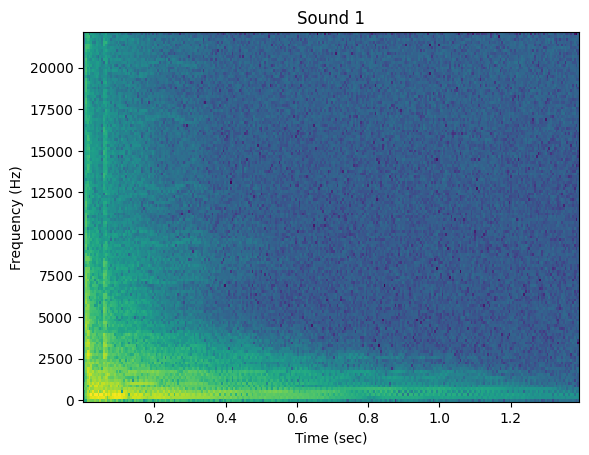

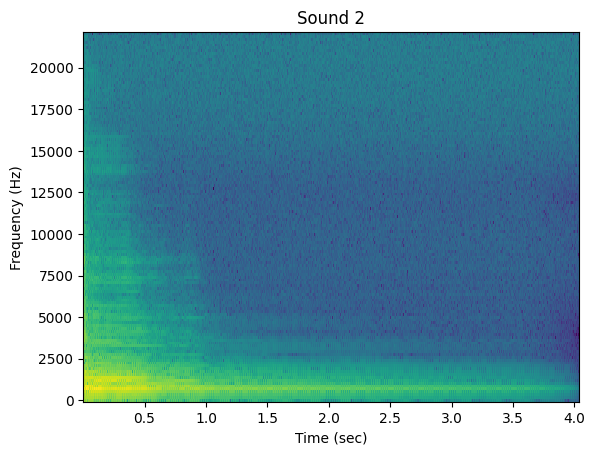

In [108]:
adata = data1[:, 0]
s = samplerate1

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.title('Sound 1')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

adata = data2[:, 0]
s = samplerate2

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.title('Sound 2')
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

Судя по спектрограмме, два звука довольно похожи друг на друга, только первый несколько повыше, а второй несколько пониже. Что насчёт мэл-кепстральных коэффициентов и гамматон-частотных кепстральных коэффициентов, то и те и другие несколько ниже во втором случае, хотя очень большой разницы опять же нет. Можно резюмировать, что два звука легко отличимы друг от друга, хоть и похожи. Учитывая, что оба звука записаны с одного инструмента, однако сыграны в них разные ноты, такая оценка выглядит разумной.